In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import levene, shapiro, kruskal, probplot, bartlett, kstest
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import pandas as pd
#import os
# File path
csv_path = 'your_output_file.csv'

# Check if the file exists
if not os.path.exists(csv_path):
    print("Error: File does not exist. Please check the file path.")
    exit()
else:
    print("File found. Proceeding with data loading...")
    df = pd.read_csv(csv_path)
    
    # Print dataset details
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("Top 5 Rows of the dataset:")
    print(df.head().to_string(index=False))
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    col_names = df.columns.tolist()
    col_types = df.dtypes.to_dict()
    print("Column names:", col_names)
    print("Column types:", col_types)

# CRIM per capita crime rate by town
#ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS proportion of non-retail business acres per town
#CHA SCharles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX nitric oxides concentration (parts per 10 million)
#RM average number of rooms per dwelling
#AG Eproportion of owner-occupied units built prior to 1940
#DIS weighted distances to five Boston employment centres
#RAD index of accessibility to radial highways
#TAX full-value property-tax rate per $10,000

File found. Proceeding with data loading...
Dataset has 1599 rows and 12 columns.
Top 5 Rows of the dataset:
 quality  volatile acidity  citric acid  chlorides  density     pH  fixed acidity_transformed  residual sugar_transformed  free sulfur dioxide_transformed  total sulfur dioxide_transformed  sulphates_transformed  alcohol_transformed
       5            0.6480       0.0000     0.4500   0.6211 0.7697                    -0.4582                     -0.6580                          -0.3359                           -0.1924                -0.6040              -1.0748
       5            0.8492       0.0000     0.7250   0.5092 0.3618                    -0.1746                      0.6281                           1.0539                            0.9127                 0.3857              -0.4962
       5            0.7151       0.0437     0.6500   0.5316 0.4408                    -0.1746                      0.1452                           0.1621                            0.5551    


Processing Box Plot for quality


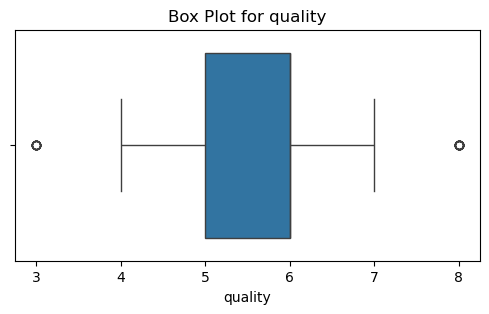

Processing Box Plot for volatile acidity


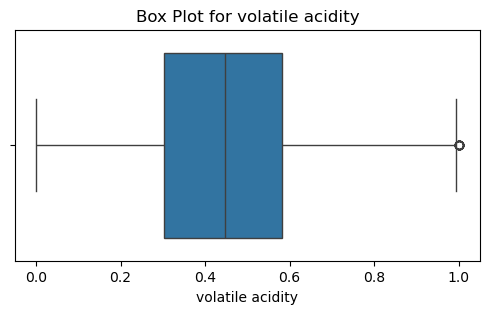

Processing Box Plot for citric acid


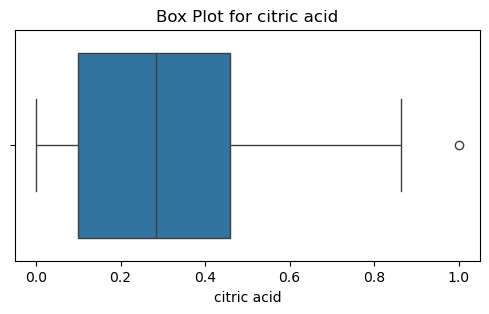

Processing Box Plot for chlorides


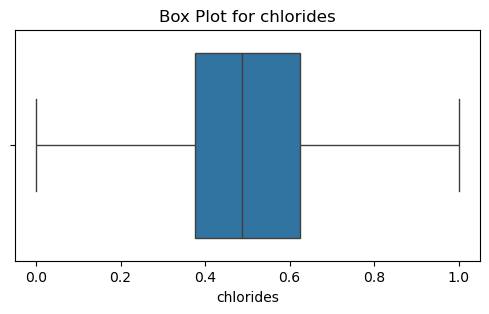

Processing Box Plot for density


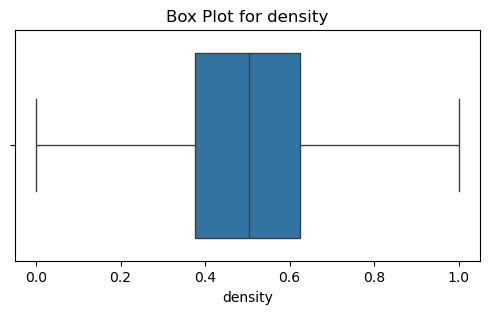

Processing Box Plot for pH


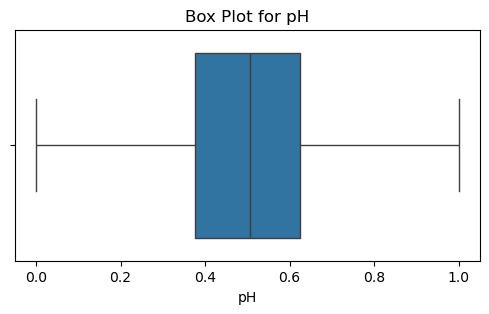

Processing Box Plot for fixed acidity_transformed


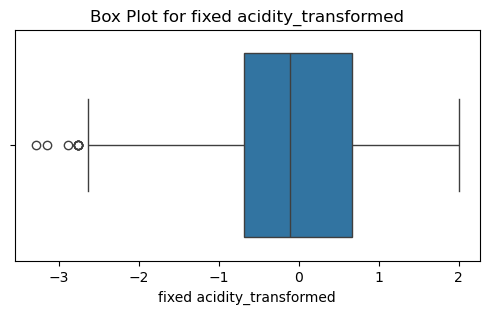

Processing Box Plot for residual sugar_transformed


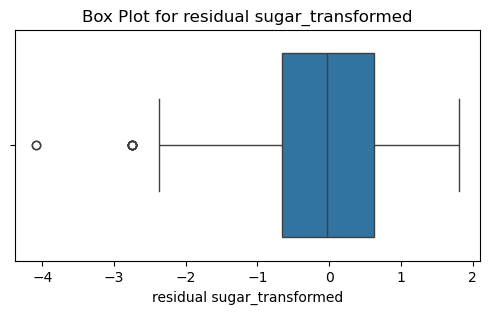

Processing Box Plot for free sulfur dioxide_transformed


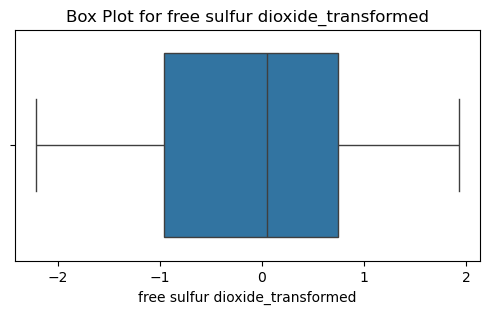

Processing Box Plot for total sulfur dioxide_transformed


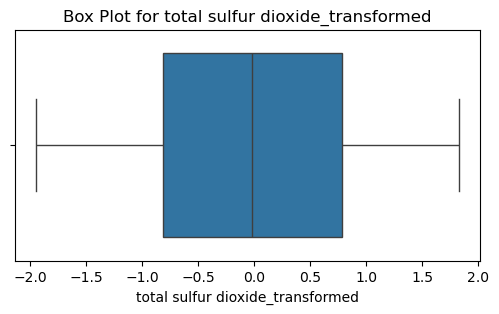

Processing Box Plot for sulphates_transformed


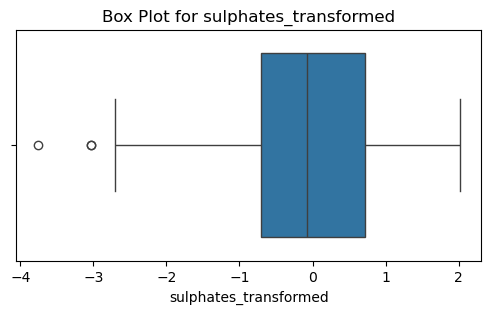

Processing Box Plot for alcohol_transformed


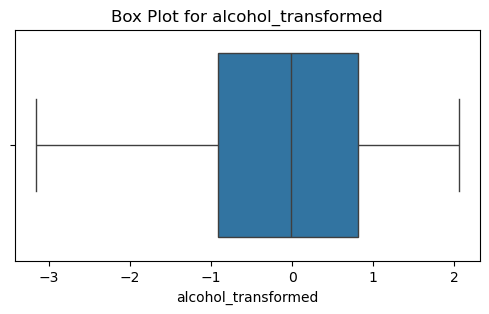



Interquartile Range (IQR):
 quality                             1.0000
volatile acidity                    0.2793
citric acid                         0.3606
chlorides                           0.2500
density                             0.2500
pH                                  0.2500
fixed acidity_transformed           1.3560
residual sugar_transformed          1.2861
free sulfur dioxide_transformed     1.7002
total sulfur dioxide_transformed    1.5955
sulphates_transformed               1.4212
alcohol_transformed                 1.7321
dtype: float64


Number of outliers in each column:
 quality                             28
volatile acidity                    19
citric acid                          1
chlorides                            0
density                              0
pH                                   0
fixed acidity_transformed            9
residual sugar_transformed          10
free sulfur dioxide_transformed      0
total sulfur dioxide_transformed     0
sulphates_t

In [8]:
# Outlier Detection with Box Plot and IQR
import seaborn as sns
import matplotlib.pyplot as plt
df.head()
print('\n=======================================================================================' )
for column in df.columns:
    print(f"Processing Box Plot for {column}")
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df[column], orient='h')
    plt.title(f'Box Plot for {column}')
    plt.show()
print("\n")
# Calculate IQR and identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):\n", IQR)

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\n")
print("Number of outliers in each column:\n", outliers)

# Remove outliers if needed (Optional)
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms_from_csv(csv_path):
    # 1. Read the CSV into a DataFrame
    df = pd.read_csv(csv_path)

    # 2. Prepare a grid of subplots
    num_cols = len(df.columns)
    # For a clean layout, pick how many subplots across you want (e.g., 4)
    plots_per_row = 4
    
    # Figure out how many rows you need
    num_rows = (num_cols + plots_per_row - 1) // plots_per_row

    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(5 * plots_per_row, 4 * num_rows))
    axes = axes.flatten()  # Flatten so we can iterate easily

    # 3. Plot a histogram for each column
    for idx, col in enumerate(df.columns):
        axes[idx].hist(df[col].dropna(), bins=30, color="blue", edgecolor="black")
        axes[idx].set_title(col)

    # 4. Hide any extra subplots if the CSV has fewer columns than (num_rows * plots_per_row)
    for extra_idx in range(idx + 1, len(axes)):
        axes[extra_idx].set_visible(False)

    # 5. Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_histograms_from_csv("your_output_file.csv")


# 3. Plot histograms for each feature
plt.figure(figsize=(20, 15))

# We have 14 columns, so let's do 5 rows x 3 columns (which gives 15 subplots, 1 unused)
for i, (col, label, color, edgecol) in enumerate(plot_specs, start=1):
    plt.subplot(5, 3, i)
    plt.hist(df[col], bins=30, color=color, edgecolor=edgecol, alpha=0.7)
    plt.xlabel(label)
    plt.title(f"Distribution of {label}")

plt.tight_layout()
plt.show()

# 4. Function to compute and comment on skewness
def report_skewness(dataframe, columns):
    """
    Prints skewness for each column and adds a simple comment on the skew.
    """
    for c in columns:
        skew_val = dataframe[c].skew()
        print(f"{c} has a skewness of {skew_val:.2f}")
        
        if skew_val > 1:
            print(f"   {c} is highly skewed (positively).")
        elif skew_val < -1:
            print(f"   {c} is highly skewed (negatively).")
        elif abs(skew_val) < 0.5:
            print(f"   {c} is fairly symmetric.")
        else:
            print(f"   {c} is moderately skewed.")
        print()

# 5. Call the skewness report function
columns_to_check = [spec[0] for spec in plot_specs]
report_skewness(df, columns_to_check)

plt.tight_layout()
plt.show()              
# Increase figure size (width=12, height=8, as an example)
#plt.figure(figsize=(8, 4))

# If you need subplots, define them here; otherwise, just plot the histogram
#plt.hist(df['HousePrice'], bins=30, color='blue', edgecolor='black', alpha=0.7)
#plt.xlabel('Charges')
#plt.title('Distribution of HousePrice (Original)')
#plt.show()


NameError: name 'plot_specs' is not defined

<Figure size 2000x1500 with 0 Axes>


Assumption 3: Little to no multicollinearity among predictors

Generating the correlation matrix heatmap...


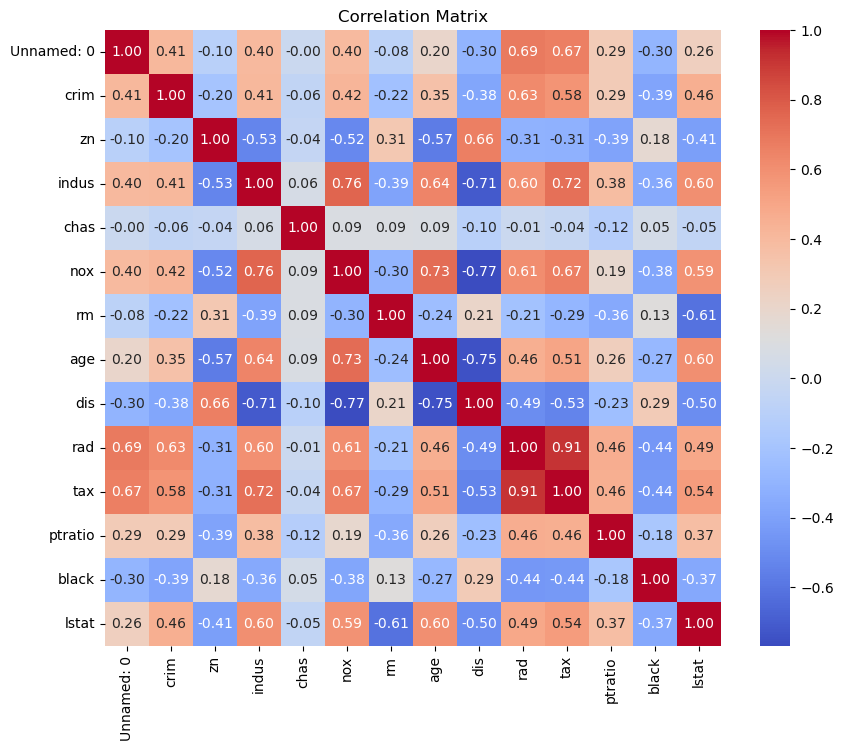


Correlations above 0.8 or below -0.8 (high correlations):
rad and tax: 0.9102281885331865

Calculating Variance Inflation Factors (VIF):
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
       Feature        VIF
0   Unnamed: 0   8.327063
1         crim   2.101118
2           zn   2.870579
3        indus  14.486784
4         chas   1.153313
5          nox  74.144422
6           rm  78.477604
7          age  21.966508
8          dis  14.789676
9          rad  16.073287
10         tax  62.842767
11     ptratio  85.150341
12       black  20.109171
13       lstat  11.108509

Features with high VIF (>10):
    Feature        VIF
3     indus  14.486784
5       nox  74.144422
6        rm  78.477604
7       age  21.966508
8       dis  14.789676
9       rad  16.073287
10      tax  62.842767
11  ptratio  85.150341
12    black  20.109171
13    lstat  11.108509

Multicollinearity assumption function 

In [63]:
# Multicollinearity Assumption
def multicollinearity_assumption():
    print('\n=======================================================================================')
    print('Assumption 3: Little to no multicollinearity among predictors')

    # Generating the correlation matrix heatmap
    print("\nGenerating the correlation matrix heatmap...")
    plt.figure(figsize=(10,8))  # Adjusting figure size for better cell visibility
    correlation_matrix = pd.DataFrame(features, columns=feature_names).corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Display values in cells
        fmt='.2f',  # Format as 2 decimal places
        cmap='coolwarm',  # Color scheme
        square=True,  # Ensures square cells
        cbar=True  # Include color bar
    )
    plt.title('Correlation Matrix')
    plt.show()

    # Highlighting high correlations
    print("\nCorrelations above 0.8 or below -0.8 (high correlations):")
    high_corr_pairs = correlation_matrix.where((correlation_matrix > 0.8) | (correlation_matrix < -0.8))
    for row in range(high_corr_pairs.shape[0]):
        for col in range(row + 1, high_corr_pairs.shape[1]):
            if not pd.isna(high_corr_pairs.iloc[row, col]):
                print(f"{feature_names[row]} and {feature_names[col]}: {high_corr_pairs.iloc[row, col]}")

    # Calculating Variance Inflation Factor (VIF)
    print('\nCalculating Variance Inflation Factors (VIF):')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif_data = pd.DataFrame({'Feature': feature_names, 'VIF': VIF})
    print(vif_data)

    # Highlight features with high VIF
    high_vif = vif_data[vif_data['VIF'] > 10]
    if not high_vif.empty:
        print("\nFeatures with high VIF (>10):")
        print(high_vif)
    else:
        print("\nNo features with VIF > 10 detected.")

    print("\nMulticollinearity assumption function executed.")

# Call the function
multicollinearity_assumption()


In [87]:
# Autocorrelation Assumption
def autocorrelation_assumption():
    print('\n=======================================================================================' )
    print('Assumption 4: No Autocorrelation')
    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation')
    else:
        print('Little to no autocorrelation')

# Call the function after calculating residuals
autocorrelation_assumption()



Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0842829709544086
Signs of positive autocorrelation


Debug: df_results columns and head:
    Actual  Predicted  Residuals  Standardized Residuals  \
0    24.0   0.897362  23.102638                0.067452   
1    21.6   0.417464  21.182536               -0.159833   
2    34.7   0.969619  33.730381                1.325470   
3    33.4   0.824644  32.575356                1.188748   
4    36.2   0.702398  35.497602                1.534658   

   Standardized Predicted  
0                1.010789  
1                0.470232  
2                1.092179  
3                0.928880  
4                0.791181  

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


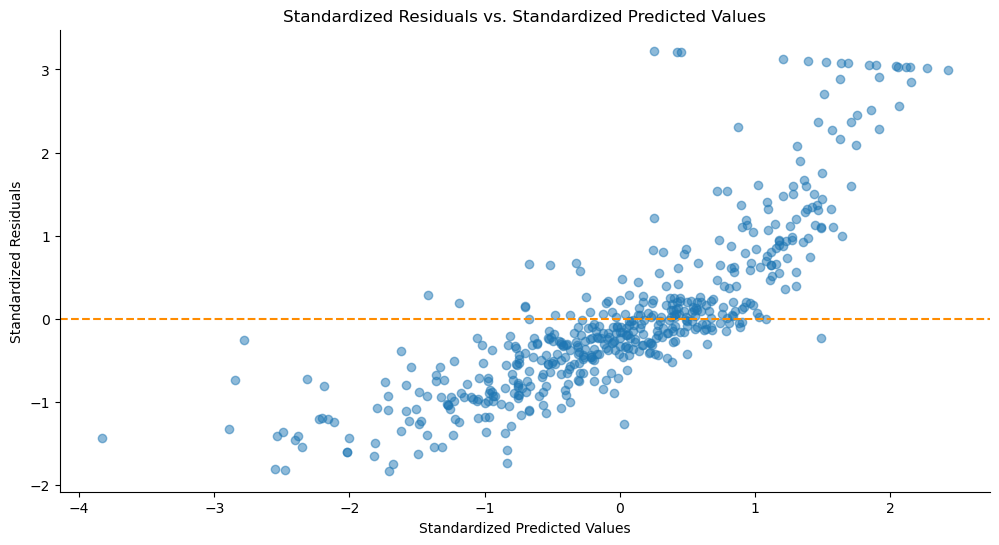


Performing Levene's Test for Heteroscedasticity
Levene's test p-value: 0.03309127799531547
Heteroscedasticity detected. Consider using weighted least squares.


In [25]:
#homoscedasticity assumption
# Import necessary modules
from sklearn.preprocessing import StandardScaler

# Debug: Check the DataFrame
# print("Debug: df_results columns and head:\n", df_results.head())
# Create predictions and residuals
predictions = model.predict(features)
df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']

# Standardize residuals and predicted values
scaler = StandardScaler()
df_results['Standardized Residuals'] = scaler.fit_transform(df_results[['Residuals']])
df_results['Standardized Predicted'] = scaler.fit_transform(df_results[['Predicted']])

# Debug: Check the DataFrame
print("Debug: df_results columns and head:\n", df_results.head())

# Define the function
def homoscedasticity_assumption():
    print('\n=======================================================================================')
    print('Assumption 5: Homoscedasticity of Error Terms')
    print('Residuals should have relative constant variance')

    # Scatter plot of standardized residuals vs. standardized predicted values
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results['Standardized Predicted'], y=df_results['Standardized Residuals'], alpha=0.5)
    plt.axhline(0, color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title('Standardized Residuals vs. Standardized Predicted Values')
    plt.xlabel('Standardized Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.show()

    # Perform Levene's Test
    print("\nPerforming Levene's Test for Heteroscedasticity")
    p_value_levene = levene(df_results['Standardized Residuals'], df_results['Standardized Predicted']).pvalue
    print(f"Levene's test p-value: {p_value_levene}")

    # Decision based on test results
    if p_value_levene < 0.05:
        print("Heteroscedasticity detected. Consider using weighted least squares.")
    else:
        print("No significant heteroscedasticity detected.")

# Call the function
homoscedasticity_assumption()


In [95]:
# Standardize residuals and predicted values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_results['Standardized Residuals'] = scaler.fit_transform(df_results[['Residuals']])
df_results['Standardized Predicted'] = scaler.fit_transform(df_results[['Predicted']])


Handling Heteroscedasticity with Yeo-Johnson Transformation
Label successfully transformed using Yeo-Johnson.


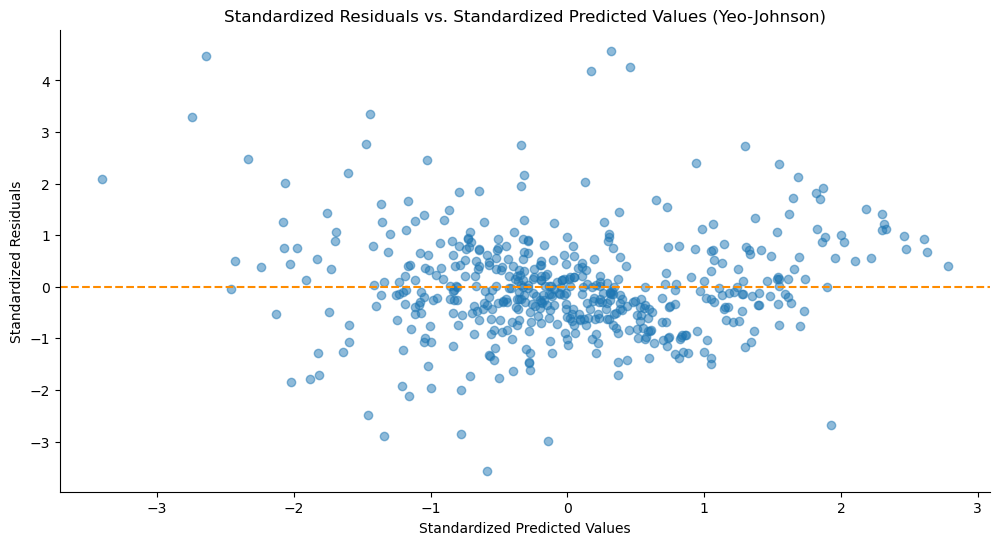


Heteroscedasticity handled using Yeo-Johnson transformation. Review the updated residual plot.


In [97]:
#from sklearn.preprocessing import PowerTransformer
scaler = StandardScaler()

df_results['Standardized Residuals'] = scaler.fit_transform(df_results[['Residuals']])
df_results['Standardized Predicted'] = scaler.fit_transform(df_results[['Predicted']])

def handle_heteroscedasticity_with_yeo_johnson():
    print('\n=======================================================================================' )
    print('Handling Heteroscedasticity with Yeo-Johnson Transformation')

    # Apply Yeo-Johnson transformation to the label
    pt = PowerTransformer(method='yeo-johnson')
    label_transformed = pt.fit_transform(label.reshape(-1, 1)).flatten()

    print("Label successfully transformed using Yeo-Johnson.")

    # Fit the model using the transformed label
    model.fit(features, label_transformed)

    # Recalculate predictions and residuals
    predictions_transformed = model.predict(features)
    residuals_transformed = label_transformed - predictions_transformed

    # Standardize the residuals for plotting
    residuals_standardized = scaler.fit_transform(residuals_transformed.reshape(-1, 1)).flatten()

    # Scatter plot of standardized residuals after transformation
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results['Standardized Predicted'], y=residuals_standardized, alpha=0.5)
    plt.axhline(0, color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title('Standardized Residuals vs. Standardized Predicted Values (Yeo-Johnson)')
    plt.xlabel('Standardized Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.show()

    print("\nHeteroscedasticity handled using Yeo-Johnson transformation. Review the updated residual plot.")

# Call the function
handle_heteroscedasticity_with_yeo_johnson()
